In [6]:
import cv2
cv2.__version__

'3.2.0-dev'

In [21]:
import numpy as np

def sliding_windows(img, x_range, y_range, window_size, xy_overlap_percent):
    windows = []
    
    x_start = x_range[0];
    x_end = x_range[1];
    y_start = y_range[0];
    y_end = y_range[1];
    
    # check values and use full image size if parameter is not given
    if (x_start == None):
        x_start = 0;
    if (x_end == None):
        x_end = img.shape[1];
    if (y_start == None):
        y_start = 0;
    if (y_end == None):
        y_end = img.shape[0];

    # window span
    x_span = x_end - x_start;
    y_span = y_end - y_start;

    # how much to move the window by each step
    x_step_size = window_size[0] * (1 - xy_overlap_percent[0])
    y_step_size = window_size[1] * (1 - xy_overlap_percent[1])

    # the region that overlaps
    x_overlap_region = window_size[0] * xy_overlap_percent[0]
    y_overlap_region = window_size[1] * xy_overlap_percent[1]

    # num of times the window fits in the span
    x_num_steps = np.int((x_span - x_overlap_region) / x_step_size)
    y_num_steps = np.int((y_span - y_overlap_region) / y_step_size)

    for y in range(y_num_steps):
        for x in range(x_num_steps):
            window_start = (np.int(x * x_step_size + x_start), np.int(y * y_step_size + y_start))
            window_end = (np.int(window_start[0] + x_step_size), np.int(window_start[1] + y_step_size))
            windows.append((window_start, window_end))
        
    return windows

42
13
30
4
('Windows Final', 89)
plotting image...


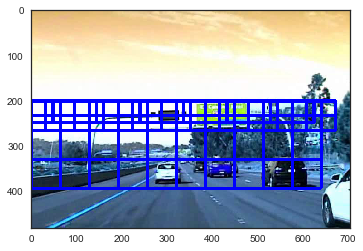

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
%matplotlib inline
import cv2
import seaborn as sns

image = cv2.imread("test.jpeg")

xy_window = [(64,64), (96,96), (128,128), (256,256)]
y_start_stop = [[200, 300], [200, 300], [200, None], [200, None]]

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

# image = np.zeros((1280, 720, 3), dtype=np.uint8)

windows_temp = []
for i in range(len(xy_window)):
    windows = sliding_windows(image, [None, None], y_start_stop[i], 
                        xy_window[i], (0.5, 0.5))
    windows = search_windows(image, windows, )
    print(len(windows))
    windows_temp.append(windows) 


#Flatten windows_temp
windows_final = sum(windows_temp, [])

print("Windows Final",len(windows_final))
window_img = draw_boxes(image, windows_final, color=(0, 0, 255), thick=6)   
with sns.axes_style("white"):
    print "plotting image..."
#     fig = plt.figure()
#     plt.subplot(121)
    plt.imshow(window_img)
#     plt.title('Example Car Image')

In [30]:
def search_windows(img, windows, clf, spatial_size, hist_bins, orient, pix_per_cell, cell_per_block, hog_channel, spatial_feat, hist_features, hog_features):
    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        features = extract_features([test_img], color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)[0]

        # transform features to be fed into classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        prediction = clf.predict(test_features)

        if prediction == 1:
            on_windows.append(window)

    return on_windows
